# Email Spam Detection Using Machine Learning Algorithms

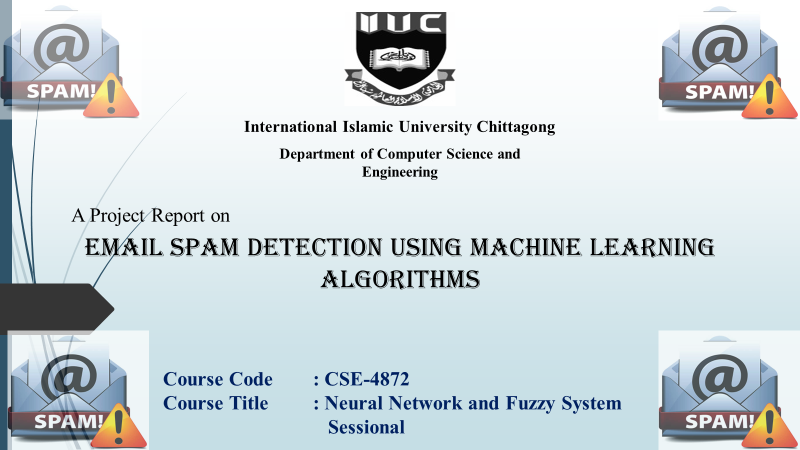

- Emailing is arguably the most convenient form of communication for professional and personal use.  
- In our daily lives, approximately 205 billion emails are sent every day globally. 
- Plenty of irrelevant and unsolicited emails are sent every day, a majority of which are auto-generated. 
- Such kinds of spam emails are used for advertising, phishing, fake purchase receipts, increasing traffic to malicious websites, loading malicious scripts and so on.
- While overlooking the spam emails, it is easy for the users to delete emails which might be relevant.
- Therefore, it is more than necessary to detect and classify the spam email.

**To successfully complete this project, we have performed the following major steps**
- Dataset Collection
- Data Preprocessing& Visualization
- Model Building
- Evaluation

*Dataset Description:* The dataset, taken from Kaggle, contains about 4600 emails labelled as spam or ham

**Objective of the Project:** To detect spam email using several machine learning classifiers and compare the accuracy. Here, we have used seven machine learning classifiers. They are:
1. Logistic Regression
2. Decision Tree Algorithm
3. Random Forests
4. Naïve Bayes Classifier
5. K-Nearest Neighbor
6. Gradient Boosting
7. Extreme Gradient Boosting

**We have taken several steps to complete the above task:**<br>

   **Data Set Collection**
 1. Importing Basic Libraries
 2. Loading Data Set, Extracting Target Variables and Labeling
 3. Printing Dataset Information<br>
**Data Preprocessing& Visualization**
 4. Counting& Sorting the Number of Distinct Elements
 5. Checking the Number of Unique Rows in each Features
 6. Calculating the Statistical Information
 7. Analyzing the Distribution of Target Variable
 8. Removal of Duplicate Rows
 9. Checking Empty Elements
 10. Fixing the Imbalance using SMOTE Technique
 11. Final Dataset size after performing Preprocessing
 12. Splitting the data intro training & testing sets
 13. Feature Scaling (Standardization)
 14. Checking the Correlation
 15. Calculating the VIFs (Variance Inflation   Factors) to Remove Multicollinearity<br>
**Model Selection& Evaluation**
 16. Importing Libraries for Prediction Scores
 17. Classification Summary Function
 18. Building Logistic Regression Classifier
 19. Building Decision Tree Classifier
 20. Building Random-Forest Classifier
 21. Building Naïve Bayes Classifier
 22. Building K-Nearest Neighbors Classifier
 23. Building Gradient Boosting Classifier
 24. Building Extreme Gradient Boosting Classifier<br>
**Model Comparison**
 25. ML Algorithms Comparison

**Step 1: Importing Basic Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 2: Loading Data Set, Extracting Target Variables and Labeling**

In [3]:
df = pd.read_csv('Spam.csv')
target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]
original_df = df.copy(deep=True)

**Step 3: Viewing& Printing Dataset Information**

In [4]:
display(df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Inference: The Datset consists of 58 features & 4601 samples.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

**Step 4: Counting& Sorting the Number of Distinct Elements**

In [6]:
df.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

**Step 5: Checking the Number of Unique Rows in each Features**

In [7]:
#Checking number of unique rows in each feature
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 57 numerical & 0 categorical features.


**Step 6: Calculating the Statistical Information of the Dataset**

In [8]:
display(df.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


**Step 7: Analyzing the Distribution of Target Variable**

            Target Variable Distribution           


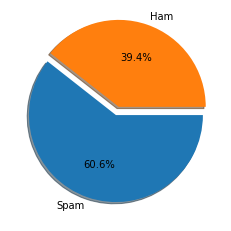

In [9]:
#Let us first analyze the distribution of the target variable
MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

**Step 8: Removal of Duplicate Rows**

In [10]:
#Removal of any Duplicate rows (if any)
counter = 0
r,c = original_df.shape
df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)
if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 391


**Step 9: Checking Empty Elements**

In [11]:
#Check for empty elements
nvc = pd.DataFrame(df1.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df1.shape[0],3)*100
print(nvc)

                            Total Null Values  Percentage
word_freq_make                              0         0.0
word_freq_857                               0         0.0
word_freq_data                              0         0.0
word_freq_415                               0         0.0
word_freq_85                                0         0.0
word_freq_technology                        0         0.0
word_freq_1999                              0         0.0
word_freq_parts                             0         0.0
word_freq_pm                                0         0.0
word_freq_direct                            0         0.0
word_freq_cs                                0         0.0
word_freq_meeting                           0         0.0
word_freq_original                          0         0.0
word_freq_project                           0         0.0
word_freq_re                                0         0.0
word_freq_edu                               0         0.0
word_freq_tabl

**Step 10:Fixing the Imbalance using SMOTE Technique**<br>
- SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. 
- It aims to balance class distribution by randomly increasing minority class examples by replicating them. 
- SMOTE synthesises new minority instances between existing minority instances.

In [23]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1


  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Furquan_Mirza\\AppData\\Local\\Temp\\pip-install-op85hlzj\\scikit-learn_b59bcba759fb40a280c89d4edfae396d\\setup.py'"'"'; __file__='"'"'C:\\Users\\Furquan_Mirza\\AppData\\Local\\Temp\\pip-install-op85hlzj\\scikit-learn_b59bcba759fb40a280c89d4edfae396d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Furquan_Mirza\AppData\Local\Temp\pip-wheel-h6le7ucu'
       cwd: C:\Users\Furquan_Mirza\AppData\Local\Temp\pip-install-op85hlzj\scikit-learn_b59bcba759fb40a280c89d4edfae396d\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module n

In [24]:
#Fixing the imbalance using SMOTE Technique
from imblearn.over_sampling import SMOTE
df5 = df1.copy()
print('Original class distribution:')
print(df5[target].value_counts())
xf = df5.columns
X = df5.drop([target],axis=1)
Y = df5[target]
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
df5 = pd.DataFrame(X, columns=xf)
df5[target] = Y
print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
1    2531
0    2531
Name: spam, dtype: int64


**Step 11:Final Dataset size after performing Preprocessing**

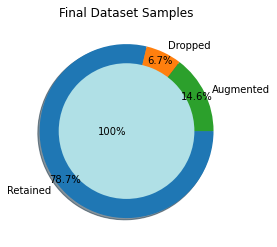


Inference:The final dataset after cleanup has 58 samples & 4601 rows.


In [25]:
#Final Dataset size after performing Preprocessing
plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_df.shape[0]-df1.shape[0], df5.shape[0]-df1.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Dropped','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0,0])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()
print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(df.shape[1], df.shape[0]))

**Step 12:Splitting the data intro training & testing sets**

In [1]:
#Splitting the data intro training & testing sets
from sklearn.model_selection import train_test_split
df = df5.copy()
df.columns=[i.replace('[','_') for i in df.columns]
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)
print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

NameError: name 'df5' is not defined

**Step 13:Feature Scaling (Standardization)**<br>
- Feature scaling is a method used to normalize the range of independent variables or features of data.
- Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format. 
- According to the above syntax, we initially create an object of the StandardScaler() function. 
- Further, we use fit_transform() along with the assigned object to transform the data and standardize it.
- StandardScaler removes the mean and scales each feature/variable to unit variance. 
- This operation is performed feature-wise in an independent way. 

In [27]:
#Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())
print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,...,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03,4.049000e+03
mean,-1.181788e-17,-5.138449e-17,-1.069313e-15,8.540375e-16,2.768291e-16,2.613096e-16,-1.774602e-16,-2.809421e-16,-9.432371e-18,-3.413751e-16,...,8.785952e-17,-4.609523e-16,-9.138981e-17,-1.102134e-16,-1.171643e-16,2.045508e-16,2.764247e-16,-8.774299e-19,2.912930e-16,6.117332e-17
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,...,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-3.806032e-01,-3.038613e-01,-6.145718e-01,-4.924316e-02,-5.175332e-01,-3.768489e-01,-3.425160e-01,-2.985626e-01,-3.596764e-01,-4.011535e-01,...,-1.078398e-01,-1.627755e-01,-5.146747e-01,-1.864316e-01,-3.739129e-01,-3.708553e-01,-1.163322e-01,-1.428956e-01,-2.791226e-01,-4.658390e-01
25%,-3.806032e-01,-3.038613e-01,-6.145718e-01,-4.924316e-02,-5.175332e-01,-3.768489e-01,-3.425160e-01,-2.985626e-01,-3.596764e-01,-4.011535e-01,...,-1.078398e-01,-1.627755e-01,-5.146747e-01,-1.864316e-01,-3.739129e-01,-3.708553e-01,-1.163322e-01,-1.215760e-01,-2.451386e-01,-4.017955e-01
50%,-3.806032e-01,-3.038613e-01,-6.145718e-01,-4.924316e-02,-5.175332e-01,-3.768489e-01,-3.425160e-01,-2.985626e-01,-3.596764e-01,-4.011535e-01,...,-1.078398e-01,-1.627755e-01,-2.417201e-01,-1.864316e-01,-2.815051e-01,-3.708553e-01,-1.163322e-01,-9.831403e-02,-2.014449e-01,-3.035954e-01
75%,-1.761834e-01,-3.038613e-01,3.439685e-01,-4.924316e-02,1.649605e-01,-2.233744e-01,-2.951399e-01,-2.985626e-01,-3.596764e-01,3.108615e-02,...,-1.078398e-01,-1.627755e-01,1.714003e-01,-1.864316e-01,8.361824e-02,4.239569e-02,-1.163322e-01,-4.905903e-02,-3.637967e-02,-3.318925e-02
max,1.508716e+01,2.514478e+01,9.569918e+00,3.094747e+01,1.396256e+01,2.012583e+01,1.710078e+01,2.626079e+01,1.736509e+01,2.799635e+01,...,3.401362e+01,1.889702e+01,3.545631e+01,3.239581e+01,3.622633e+01,2.325529e+01,4.649757e+01,3.372376e+01,4.821121e+01,2.207749e+01



                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,...,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.022594,0.078090,0.046689,-0.041432,0.000399,0.007112,-0.021484,-0.016603,-0.042949,0.034479,...,-0.041567,-0.010314,-0.038633,-0.008821,-0.034493,-0.043393,0.038928,0.026360,-0.006383,-0.053263
std,1.031372,1.595409,1.049025,0.107505,0.907890,0.850894,0.903868,0.843287,0.848563,0.939448,...,0.569688,1.078484,0.680466,1.588537,0.594731,0.725884,1.276208,1.083348,0.675887,0.783383
min,-0.380603,-0.303861,-0.614572,-0.049243,-0.517533,-0.376849,-0.342516,-0.298563,-0.359676,-0.401153,...,-0.107840,-0.162776,-0.514675,-0.186432,-0.373913,-0.370855,-0.116332,-0.142896,-0.279123,-0.465839
25%,-0.380603,-0.303861,-0.614572,-0.049243,-0.517533,-0.376849,-0.342516,-0.298563,-0.359676,-0.401153,...,-0.107840,-0.162776,-0.514675,-0.186432,-0.373913,-0.370855,-0.116332,-0.121558,-0.245139,-0.406065
50%,-0.380603,-0.303861,-0.614572,-0.049243,-0.517533,-0.376849,-0.342516,-0.298563,-0.359676,-0.401153,...,-0.107840,-0.162776,-0.246343,-0.186432,-0.273617,-0.370855,-0.116332,-0.100620,-0.211155,-0.313558
75%,-0.176183,-0.303861,0.423847,-0.049243,0.220952,-0.063032,-0.342516,-0.298563,-0.359676,0.083072,...,-0.107840,-0.162776,0.152957,-0.186432,0.093761,0.046331,-0.116332,-0.054624,-0.050944,-0.033189
max,9.056776,37.869105,6.774176,2.726728,8.532526,6.945536,7.143464,8.379247,4.762308,7.815067,...,11.254608,18.975577,6.611652,47.695497,7.723675,7.650149,30.747244,20.333899,6.187550,12.469535


**Step 14:Checking the Correlation**<br>
- Correlation explains how one or more variables are related to each other. 
- These variables can be input data features which have been used to forecast our target variable. 
- Correlation, statistical technique which determines how one variables moves/changes in relation with the other variable

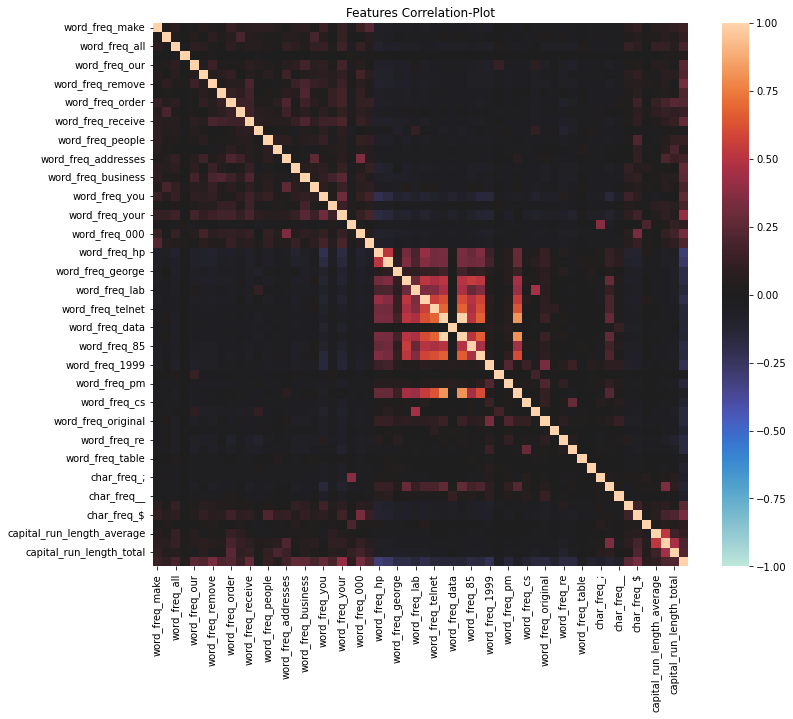

In [28]:
#Checking the correlation
import seaborn as sns
features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0) #, 
plt.show()

**Step 15:Calculating the VIFs (Variance Inflation Factors) to Remove Multicollinearity**
- When two or more predictors are highly correlated in a regression model
- How much the varaince of an estimated regression coefficient is increases if predictors are correlated 
- Each predictor have VIF value in the analysis
- VIF Value lies in between 1-10 then there is moderate multicollinearity problem in the regression model
- If VIF value is less than 1 and greater than 10, there is multicollinearity problem in the regression model
- If VIF is equal to 1, then no multicollinearity among the factors
- If VIF is greater than 1, then factors are moderately correlated
- If it is closer to 10, then serious issues of multicolinearity

In [29]:
# Calculate the VIFs to remove multicollinearity
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report
Evaluation_Results = pd.DataFrame(np.zeros((7,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score
Logistic Regression (LR),0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0


**Step 16: Importing Libraries for Prediction Scores**

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

**Step 17: Defining Classification Summary Function**

In [31]:
#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))

**Step 18: Building Logistic Regression Classifier**<br>
Mathematic Behind Logistic Regression:
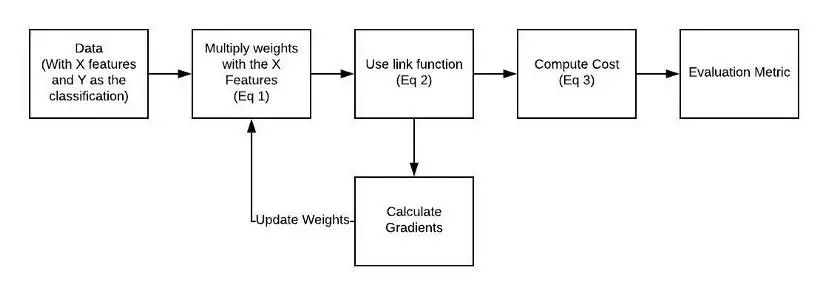

In [32]:
# Building Logistic Regression Classifier
from scipy.stats import loguniform
LR_model = LogisticRegression()
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
space = dict()
space['solver'] = ['newton-cg', 'liblinear'] # 'lbfgs',
space['penalty'] = ['l2'] #'none','l1','elasticnet'
space['C'] = loguniform(1e-5, 100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(LR_model, space, n_iter=50, n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 94.3%
F1 Score = 94.3%

 Confusiton Matrix:
 [[486  27]
 [ 31 469]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       513
           1       0.95      0.94      0.94       500

    accuracy                           0.94      1013
   macro avg       0.94      0.94      0.94      1013
weighted avg       0.94      0.94      0.94      1013



**Step 19: Building Decision Tree Classifier**<br>
Algorithm:
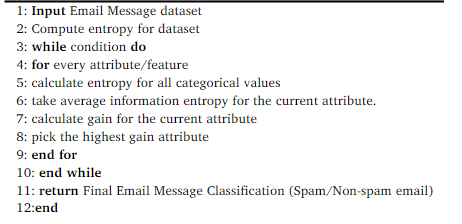

In [33]:
#Building Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier  
DT_model = DecisionTreeClassifier()
from sklearn import tree
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 91.4%
F1 Score = 91.4%

 Confusiton Matrix:
 [[464  49]
 [ 38 462]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       513
           1       0.90      0.92      0.91       500

    accuracy                           0.91      1013
   macro avg       0.91      0.91      0.91      1013
weighted avg       0.91      0.91      0.91      1013



**Step 20: Building Random-Forest Classifier**<br>
Flowchart:
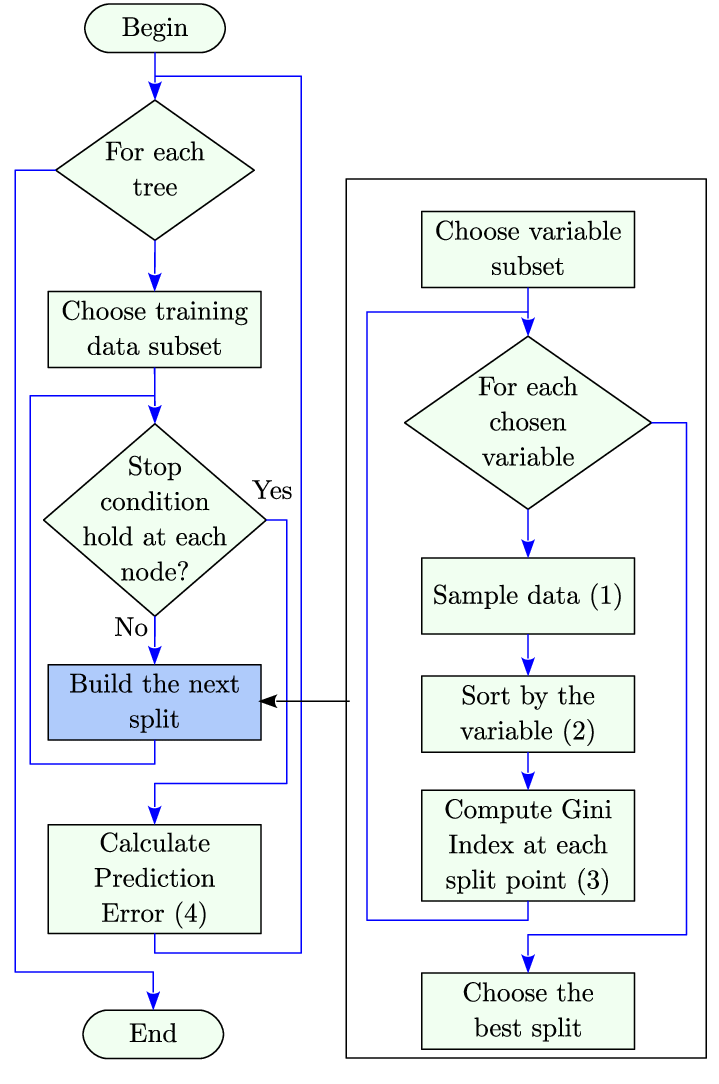

In [34]:
# Building Random-Forest Classifier
RF_model = RandomForestClassifier()
param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, n_jobs=-1, cv=5, random_state=1)
RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 96.7%
F1 Score = 96.7%

 Confusiton Matrix:
 [[497  16]
 [ 17 483]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       513
           1       0.97      0.97      0.97       500

    accuracy                           0.97      1013
   macro avg       0.97      0.97      0.97      1013
weighted avg       0.97      0.97      0.97      1013



**Step 21: Building Naïve Bayes Classifier**<br>
Flowchart:
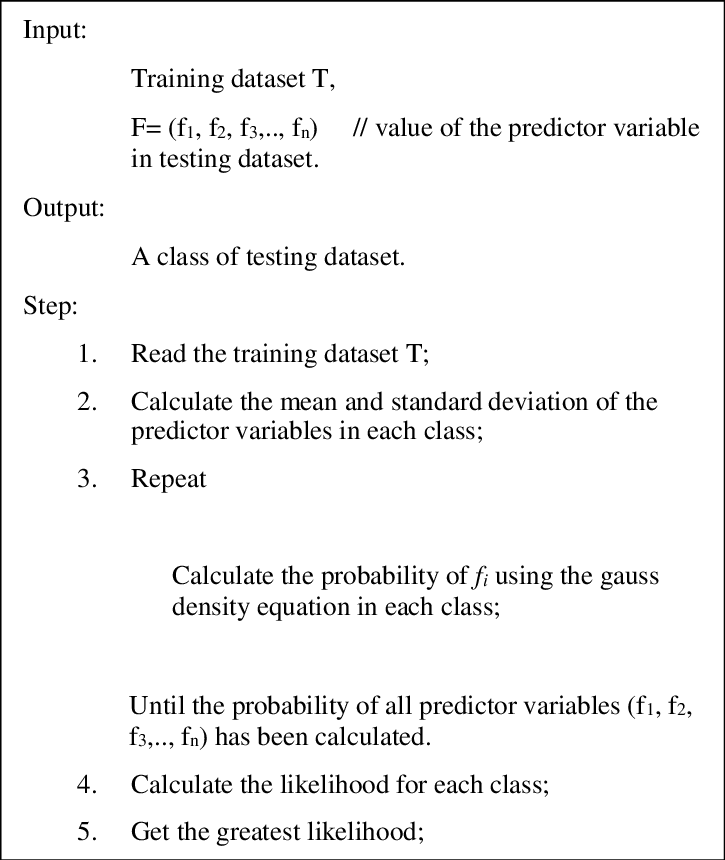

In [35]:
from sklearn.naive_bayes import BernoulliNB
NB_model = BernoulliNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RCV = RandomizedSearchCV(NB_model, params, n_iter=50, n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 92.30000000000001%
F1 Score = 92.30000000000001%

 Confusiton Matrix:
 [[495  18]
 [ 60 440]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       513
           1       0.96      0.88      0.92       500

    accuracy                           0.92      1013
   macro avg       0.93      0.92      0.92      1013
weighted avg       0.93      0.92      0.92      1013



**Step 22: Building K-Nearest Neighbors Classifier**<br>
Flowchart:
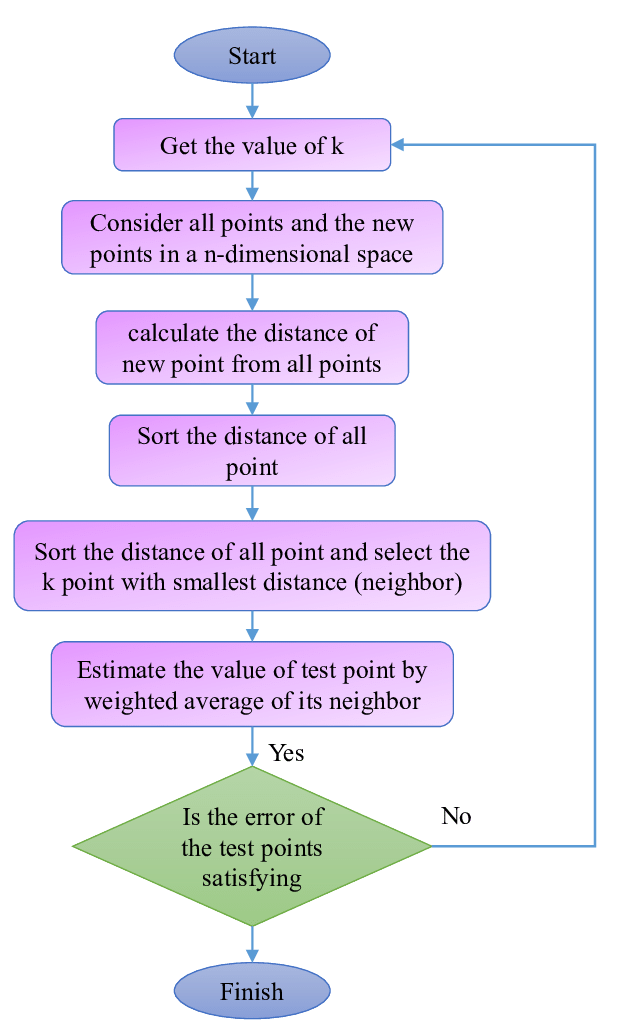

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50,  n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 95.6%
F1 Score = 95.6%

 Confusiton Matrix:
 [[500  13]
 [ 32 468]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       513
           1       0.97      0.94      0.95       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



**Step 23: Building Gradient Boosting Classifier**<br>
Steps:
   - Step 1: Calculate the average of the target label
   - Step 2: Calculate the residuals
   - Step 3: Construct a decision tree
   - Step 4: Predict the target label using all of the trees within the ensemble
   - Step 5: Compute the new residuals
   - Step 6: Repeat steps 3 to 5 until the number of iterations matches the number specified by the hyperparameter (i.e. number of estimators)
   - Step 7: Once trained, use all of the trees in the ensemble to make a final prediction as to the value of the target variable

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 96.2%
F1 Score = 96.1%

 Confusiton Matrix:
 [[497  16]
 [ 23 477]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       513
           1       0.97      0.95      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



**Step 24: Building Extreme Gradient Boosting Classifier**<br>
Working Principle:
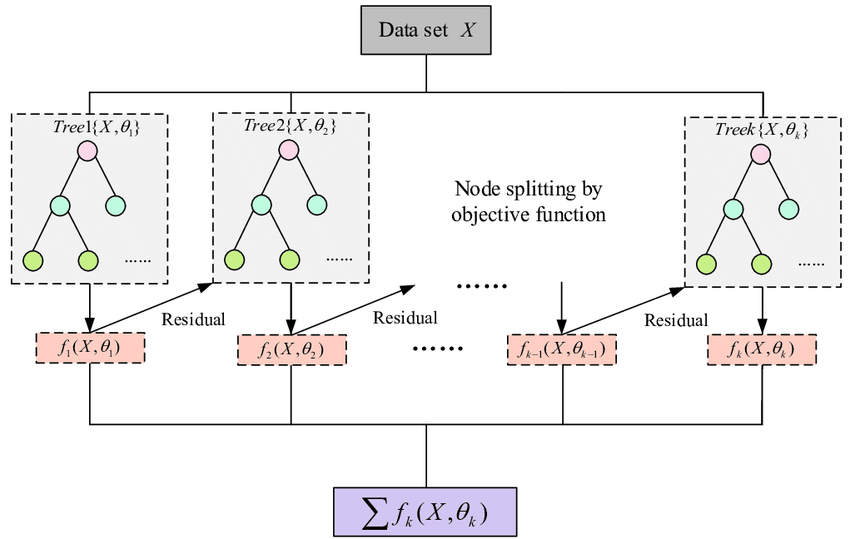

In [39]:
!pip install xgboost

In [40]:
from xgboost.sklearn import XGBClassifier
XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')
param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y, eval_metric='logloss')#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 96.39999999999999%
F1 Score = 96.39999999999999%

 Confusiton Matrix:
 [[495  18]
 [ 18 482]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       513
           1       0.96      0.96      0.96       500

    accuracy                           0.96      1013
   macro avg       0.96      0.96      0.96      1013
weighted avg       0.96      0.96      0.96      1013



**Step 25: Model Comparison**

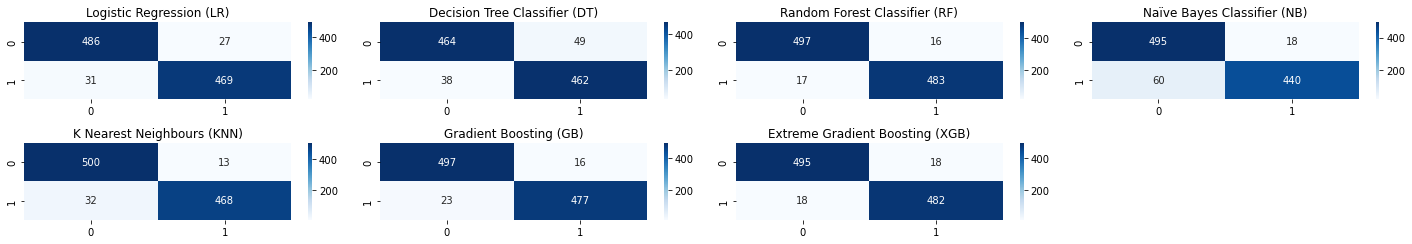

In [41]:
import math
def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,KNN,GB,XGB])

                                    ML Algorithms Comparison                                    


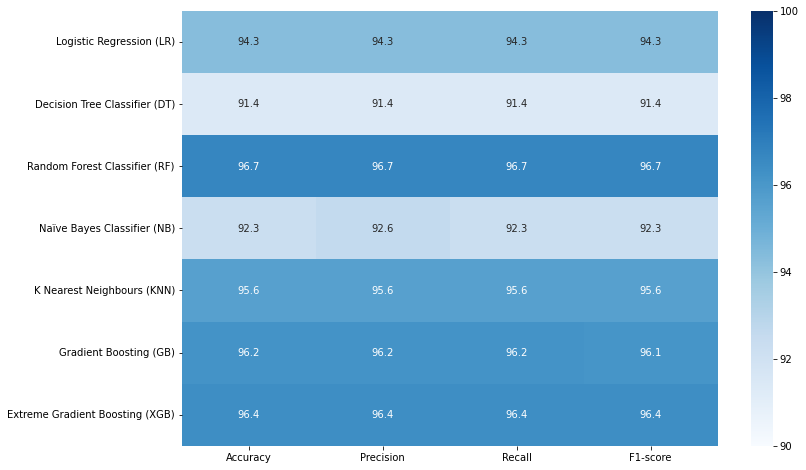

In [42]:
print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='Blues', fmt='.1f')
plt.show()

**As we can see above, Random Forest Classifier is showing the maximum accuracy of 96.7%.**